1. Mengidentifikasi perokok tertinggi dan terendah berdasarkan kelompok umur dan wilyah.
- Kelompok umur mana yang memiliki persentase merokok tertinggi?
- Perbedaan mencolok antar kelompok umur
- wilayah mana yang memiliki tingkat perokok tertinggi
- Perbandingan wilayah dengan persentase merokok tertinggi


2. Mengetahui perubahan tren perokok dari perbandingan antar tahun
- tahun berapa terjadi kenaikan atau penurunan tingkat merokok menurut usia
- wilayah mana yang mengalami perubahan signifikan?
- perubahan rata-rata wilayah antar tahun

3. Analisa pola umum dari data
- korelasi data antara kelompok umur dan persentase perokok


In [ ]:
#import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data1 = pd.read_csv("data_csv/dataB/2020b.csv")
data2 = pd.read_csv("data_csv/dataB/2021b.csv")
data3 = pd.read_csv("data_csv/dataB/2022b.csv")
data4 = pd.read_csv("data_csv/dataB/2023b.csv")

#cek struktur data
# data.info()
# data
gdata = pd.concat([data1,data2,data3,data4])
# hgdata = gdata.groupby("Wilayah")
gdata.describe(include='all').T

In [ ]:
# Rata-rata Persentase Merokok Kelompok Umur (2020–2023)

rata_umur = gdata.drop(columns=["tahun", "Wilayah"]).mean()
sns.barplot(x=rata_umur.index, y=rata_umur.values, palette="Spectral")
# for i, v in enumerate(rata_umur.values):
#     lb.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.title("Rata-rata Persentase Merokok per Kelompok Umur")
plt.ylabel("Persentase (%)")
plt.xlabel("Kelompok Umur")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_all = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Ambil kolom yang berkaitan dengan perokok
smoking_columns = [col for col in df_all.columns if "Perokok" in col]

# Hitung rata-rata untuk tiap kelompok umur per tahun
mean_by_year = df_all.groupby("tahun")[smoking_columns].mean()

# Transpose agar: baris = kelompok umur, kolom = tahun
avg_by_year = mean_by_year.transpose()

# Hitung korelasi antar tahun
correlation_between_years = avg_by_year.corr()

# Visualisasikan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_between_years, annot=True, cmap='Reds', fmt=".2f")
plt.title("Matriks Korelasi Rata-rata Perokok Antar Tahun (Berdasarkan Kelompok Umur)")
plt.tight_layout()
plt.show()

In [ ]:
# korelasi

# yearr = pd.concat([data1, data2, data3, data4], ignore_index=True)

# # korelasi matriks Rata-rata perokok kelompok umur
# smoking_columns = [col for col in yearr.columns if "Perokok" in col]

# # Hitung rata-rata per tahun
# mean_by_year = yearr.groupby("tahun")[smoking_columns].mean()

# # Hitung korelasi
# correlation_matrix = mean_by_year.corr()

# # Visualisasi heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Matriks Korelasi Rata-Rata Perokok per Kelompok Umur (2020–2023)")
# plt.tight_layout()
# plt.show()

data fitra

In [ ]:
# Cell 1: Import libraries dan load data
import pandas as pd
import numpy as np

# Load CSV files
data1 = pd.read_csv("data_csv/dataB/2020b.csv")
data2 = pd.read_csv("data_csv/dataB/2021b.csv") 
data3 = pd.read_csv("data_csv/dataB/2022b.csv")
data4 = pd.read_csv("data_csv/dataB/2023b.csv")

print("Data loaded successfully!")
print(f"2020: {data1.shape}, 2021: {data2.shape}, 2022: {data3.shape}, 2023: {data4.shape}")

# Cell 2: Lihat struktur data
print("Kolom yang tersedia:")
print(data1.columns.tolist())
print("\nContoh data 2020:")
data1.head()

# Cell 3: Pilih hanya kolom Wilayah dan tahun
# Method 1: Pilih kolom sebelum concat
data1_selected = data1[['Wilayah', 'tahun']]
data2_selected = data2[['Wilayah', 'tahun']]
data3_selected = data3[['Wilayah', 'tahun']]
data4_selected = data4[['Wilayah', 'tahun']]

# Gabungkan data
wilayah_tahun = pd.concat([data1_selected, data2_selected, data3_selected, data4_selected], ignore_index=True)

print("Data setelah dipilih kolom Wilayah dan tahun:")
print(f"Shape: {wilayah_tahun.shape}")
wilayah_tahun.head(10)

# Cell 4: Alternatif - concat dulu baru pilih kolom
yearr = pd.concat([data1, data2, data3, data4], ignore_index=True)
wilayah_tahun_alt = yearr[['Wilayah', 'tahun']]

print("Alternatif method:")
print(f"Shape: {wilayah_tahun_alt.shape}")
wilayah_tahun_alt.head()

# Cell 5: Eksplorasi data
print("=== EKSPLORASI DATA ===")
print(f"Total baris: {len(wilayah_tahun)}")
print(f"Jumlah wilayah unik: {wilayah_tahun['Wilayah'].nunique()}")
print(f"Tahun yang tersedia: {sorted(wilayah_tahun['tahun'].unique())}")

print("\nJumlah data per tahun:")
print(wilayah_tahun['tahun'].value_counts().sort_index())

# Cell 6: Lihat semua wilayah
print("=== DAFTAR SEMUA WILAYAH ===")
wilayah_list = wilayah_tahun['Wilayah'].unique()
for i, wilayah in enumerate(sorted(wilayah_list), 1):
    print(f"{i:2d}. {wilayah}")

# Cell 7: Contoh filter data spesifik
print("=== CONTOH FILTER DATA ===")

# Filter untuk wilayah tertentu
bogor_data = wilayah_tahun[wilayah_tahun['Wilayah'] == 'Bogor']
print("Data Bogor:")
print(bogor_data)

# Filter untuk tahun tertentu
data_2023 = wilayah_tahun[wilayah_tahun['tahun'] == 2023]
print(f"\nJumlah wilayah di tahun 2023: {len(data_2023)}")
print("Wilayah di 2023:")
print(data_2023['Wilayah'].tolist())

# Cell 8: Pivot table untuk melihat data lebih rapi
pivot_table = wilayah_tahun.pivot_table(
    index='Wilayah', 
    columns='tahun', 
    aggfunc='size', 
    fill_value=0
)

print("=== PIVOT TABLE WILAYAH vs TAHUN ===")
print("(1 = ada data, 0 = tidak ada data)")
pivot_table.head(10)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca semua file CSV
data1 = pd.read_csv("data_csv/dataB/2020b.csv")
data2 = pd.read_csv("data_csv/dataB/2021b.csv")
data3 = pd.read_csv("data_csv/dataB/2022b.csv")
data4 = pd.read_csv("data_csv/dataB/2023b.csv")

# Tambahkan kolom tahun secara eksplisit jika belum ada
data1["tahun"] = 2020
data2["tahun"] = 2021
data3["tahun"] = 2022
data4["tahun"] = 2023

# Gabungkan semua data
yearr = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Normalisasi nama kolom
yearr.columns = yearr.columns.str.strip().str.lower()

# Ambil kolom perokok (yang ingin dihitung rata-ratanya)
smoking_columns = [col for col in yearr.columns if "perokok" in col]

# Hitung rata-rata per wilayah per tahun
mean_by_region = yearr.groupby(['wilayah', 'tahun'])[smoking_columns].mean().mean(axis=1).unstack()

# Plot
labels = mean_by_region.index
x = np.arange(len(labels))
width = 0.18

fig, ax = plt.subplots(figsize=(14, 6))

bars_2020 = ax.bar(x - 1.5*width, mean_by_region[2020], width, label='2020')
bars_2021 = ax.bar(x - 0.5*width, mean_by_region[2021], width, label='2021')
bars_2022 = ax.bar(x + 0.5*width, mean_by_region[2022], width, label='2022')
bars_2023 = ax.bar(x + 1.5*width, mean_by_region[2023], width, label='2023')

# Fungsi label angka
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Tambahkan label
add_labels(bars_2020)
add_labels(bars_2021)
add_labels(bars_2022)
add_labels(bars_2023)

# Set label
ax.set_xlabel("Wilayah")
ax.set_ylabel("Rata-Rata Pengguna Perokok (%)")
ax.set_title("Perbandingan Rata-Rata Perokok Berdasarkan Wilayah")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title="Tahun")
plt.ylim(0, max(mean_by_region.max()) + 5)
plt.tight_layout()
plt.show()


In [ ]:
# Wilayah dengan Persentase Merokok Tertinggi (Usia 25–34 Tahun)
age_25_34 = gdata.groupby("Wilayah")["Perokok 25-34"].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=age_25_34.values, y=age_25_34.index, palette="viridis")
plt.title("Wilayah dengan Persentase Merokok Tertinggi")
plt.xlabel("Rata-rata Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()

In [ ]:
# Hitung total persentase untuk setiap baris
gdata["Total_Persentase"] = gdata.drop(columns=["Wilayah", "tahun"]).sum(axis=1)

# Ambil rata-rata total per wilayah
top_total = gdata.groupby("Wilayah")["Total_Persentase"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_total.values, y=top_total.index, palette="rocket")
plt.title("10 Wilayah dengan Persentase Merokok Tertinggi (Total Semua Kelompok Umur)")
plt.xlabel("Rata-rata Total Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()


In [ ]:
# import numpy as np
# kol_perokok = ['Perokok 15-24', 'Perokok 25-34', 'Perokok 35-44', 'Perokok 45-54', 'Perokok 55-64', 'Perokok 65+']
# for kolom in kol_perokok:
#     rata = data[(data[kolom] >= 0) & (data[kolom] <= 100)][kolom].mean()
#     data.loc[(data[kolom] < 0) | (data[kolom] > 100), kolom] = rata
# stat = data[kol_perokok].describe(include='all').T

# stat["range"] = stat["max"] - stat["min"]
# data.reset_index(inplace=True)
# stat.rename(columns={"index": "Kelompok Umur"}, inplace=True)

# stat.describe(include='all').T
# data2.describe(include='all').T
# data

DATA WILAYAH

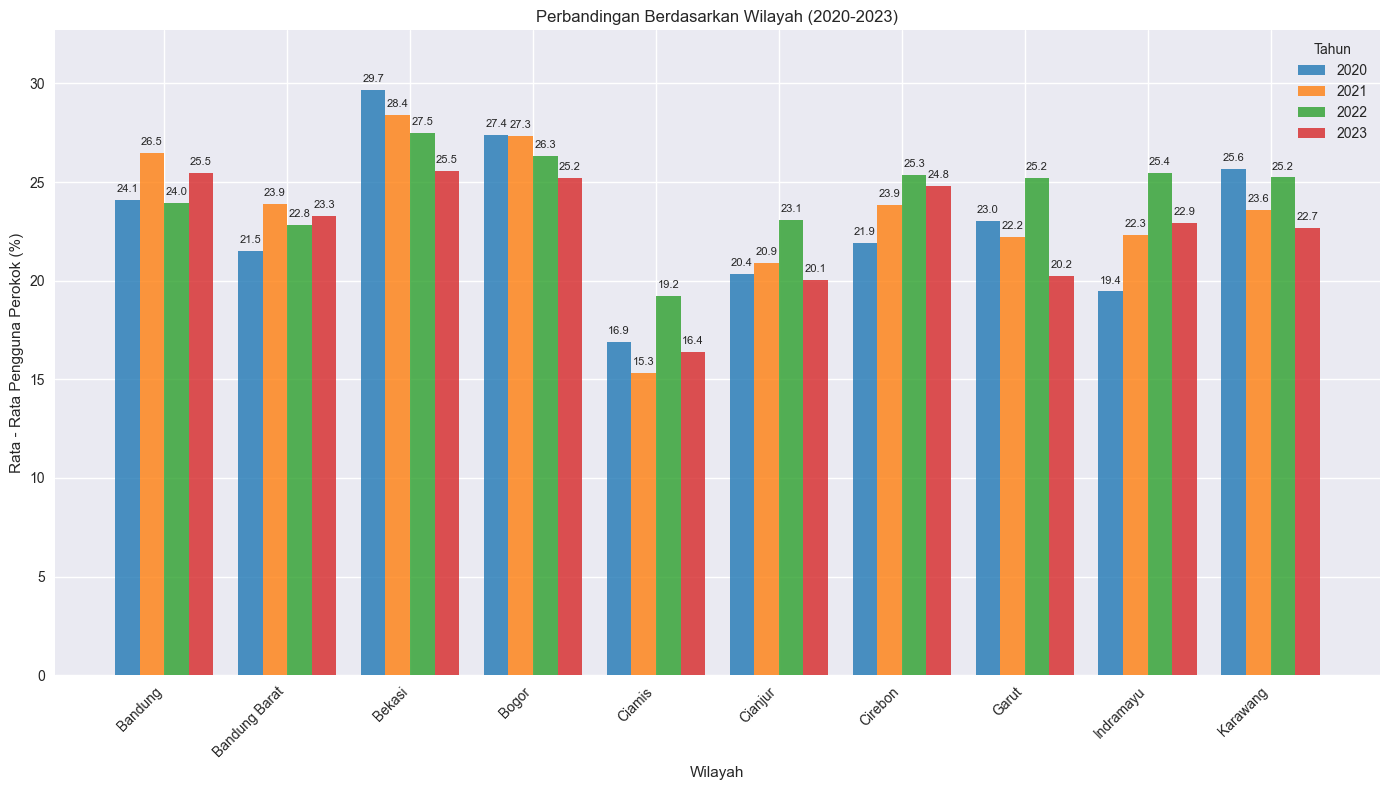

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
data1 = pd.read_csv("data_csv/dataB/2020b.csv")
data2 = pd.read_csv("data_csv/dataB/2021b.csv")
data3 = pd.read_csv("data_csv/dataB/2022b.csv")
data4 = pd.read_csv("data_csv/dataB/2023b.csv")




# Gabungkan data dan cek hasil
yearr = pd.concat([data1, data2, data3, data4], ignore_index=True)
smoking_columns = [col for col in yearr.columns if "Perokok" in col]

# Cek apakah ada masalah dengan pivot

# Test dengan kelompok umur 25-34 saja
test_pivot = yearr.pivot(index='Wilayah', columns='tahun', values='Perokok 25-34')

# Test dengan rata-rata
yearr['test_avg'] = yearr[smoking_columns].mean(axis=1)
test_avg_pivot = yearr.pivot(index='Wilayah', columns='tahun', values='test_avg')

# MEMBUAT GRAFIK YANG BENAR

# Pilih kolom tertentu, misalnya Perokok 25-34
selected_column = 'Perokok 25-34'
data_for_chart = yearr.pivot(index='Wilayah', columns='tahun', values=selected_column)

# Pilih 8 wilayah pertama
chart_data = data_for_chart.head(10)


# Buat grafik
labels = chart_data.index
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

# Cek apakah kolom tahun ada
years = [2020, 2021, 2022, 2023]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars = []
for i, year in enumerate(years):
    if year in chart_data.columns:
        bar = ax.bar(x + i*width - 1.5*width, chart_data[year], width, 
                    label=str(year), alpha=0.8, color=colors[i])
        bars.append(bar)
        
        # Tambahkan label di atas bar
        for j, v in enumerate(chart_data[year]):
            if not pd.isna(v):
                ax.text(x[j] + i*width - 1.5*width, v + 0.3, f'{v:.1f}', 
                       ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Wilayah')
ax.set_ylabel(f'Rata - Rata Pengguna Perokok (%)')
ax.set_title(f'Perbandingan Berdasarkan Wilayah (2020-2023)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Tahun')

# Set y-limit yang reasonable
if not chart_data.empty:
    max_val = chart_data.max().max()
    ax.set_ylim(0, max_val + 3)

plt.tight_layout()
plt.show()

Dari Grafik ini menunjukkan tren rata rata persentase perokok usia 15-24 tahun di jawa barat selama 4 tahun terakhir
- 2020: sekitar 14.88%
- 2021: sekitar 13.89%
- 2022: sekitar 13.70%
- 2023: sekitar 13.41%

Tren menunjukkan penurunan bertahap dari tahun 2020 hingga 2023

Prediksi untuk tahun 2024:
Terdapat dua kemungkinan yang dapat terjadi yaitu, terjadi perubahan signifikan (penurunan), dan tidak ada perubahan signifikan untuk 2024

prediksi untuk tahun 2025:
Terdapat dua kemungkinan juga yang sama seperti tahun 2024 yaitu terjadi perubahan signifikan (penurunan), atau tidak ada perubahan yang signifikan

# Interpretasi (2024 - 2025) #

Dari model yang kita gunakan, yaitu model linear regression.
- Model memprediksi bahwa persentase perokok remaja akan menurun secara bertahap hingga tahun 2025 dan seterusnya
- Penurunan ini bersifat moderat namun konsisten, berdasarkan tren dari 2020 hingga 2023